<a href="https://colab.research.google.com/github/NandoCastro09/CLONE_INSTA/blob/main/ENEM2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive') #aqui eu estou importando as lib's e também o arquivo SVG

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Passo 1: Determine o número total de linhas
total_lines = sum(1 for line in open('/content/drive/My Drive/MICRODADOS_ENEM_2020.csv',encoding='ISO-8859-1'))

# Passo 2: Calcule 90% do total
lines_to_read = int(total_lines * 0.8)

# Passo 3: Leia apenas as linhas desejadas
dados = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2020.csv',encoding='ISO-8859-1', sep=';', nrows=lines_to_read)

print(dados)

         NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0        200006271946    2020               11       F                1   
1        200001195856    2020               11       M                2   
2        200001943954    2020                4       F                2   
3        200001908998    2020                2       M                1   
4        200001634757    2020                4       F                1   
...               ...     ...              ...     ...              ...   
4626483  200001718321    2020               11       M                1   
4626484  200006333219    2020               16       F                1   
4626485  200005057989    2020                1       F                1   
4626486  200001418861    2020                2       M                1   
4626487  200002471557    2020                7       M                1   

         TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                  2   

Colunas disponíveis no DataFrame: Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO

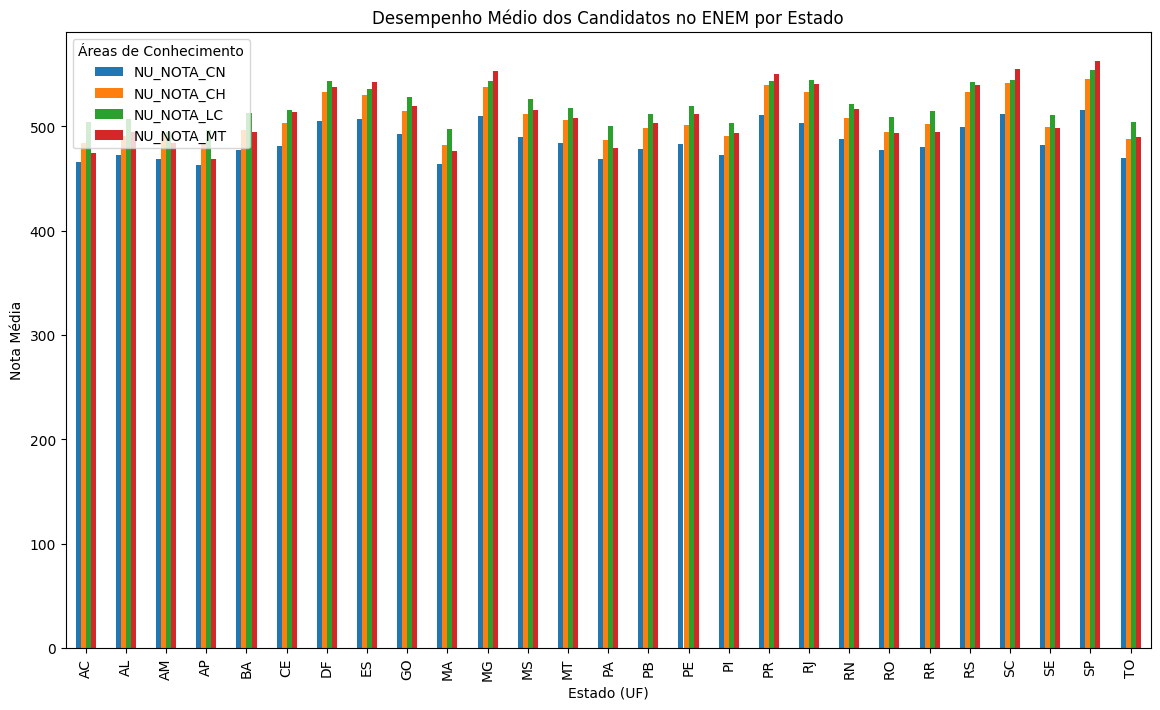

In [ ]:
if 'dados' in locals():
    print("Colunas disponíveis no DataFrame:", dados.columns)

    #aqui eu estou removendo os candidatos sem nota
    dados.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

    #fiz esse IF pra o código ignorar as colunas que não tem UF
    if 'SG_UF_PROVA' in dados.columns:
        #tirando a média
        media_por_estado = dados.groupby('SG_UF_PROVA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean()

        #criando um gráfico
        media_por_estado.plot(kind='bar', figsize=(14, 8))
        plt.title('Desempenho Médio dos Candidatos no ENEM por Estado')
        plt.xlabel('Estado (UF)')
        plt.ylabel('Nota Média')
        plt.legend(title='Áreas de Conhecimento')
        plt.show()
    else: #else, caso o código dê erro
        print("Erro: coluna 'SG_UF_PROVA' não encontrada no arquivo.")

In [ ]:
# Remover registros com valores ausentes nas notas
dados_limpos = dados_selecionados.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])


NameError: name 'dados_selecionados' is not defined


Maior estado por média em cada área de conhecimento:
NU_NOTA_CN: SP (média = 516.81)
NU_NOTA_CH: SP (média = 549.78)
NU_NOTA_LC: SP (média = 543.64)
NU_NOTA_MT: SP (média = 574.17)
NU_NOTA_REDACAO: MG (média = 668.69)


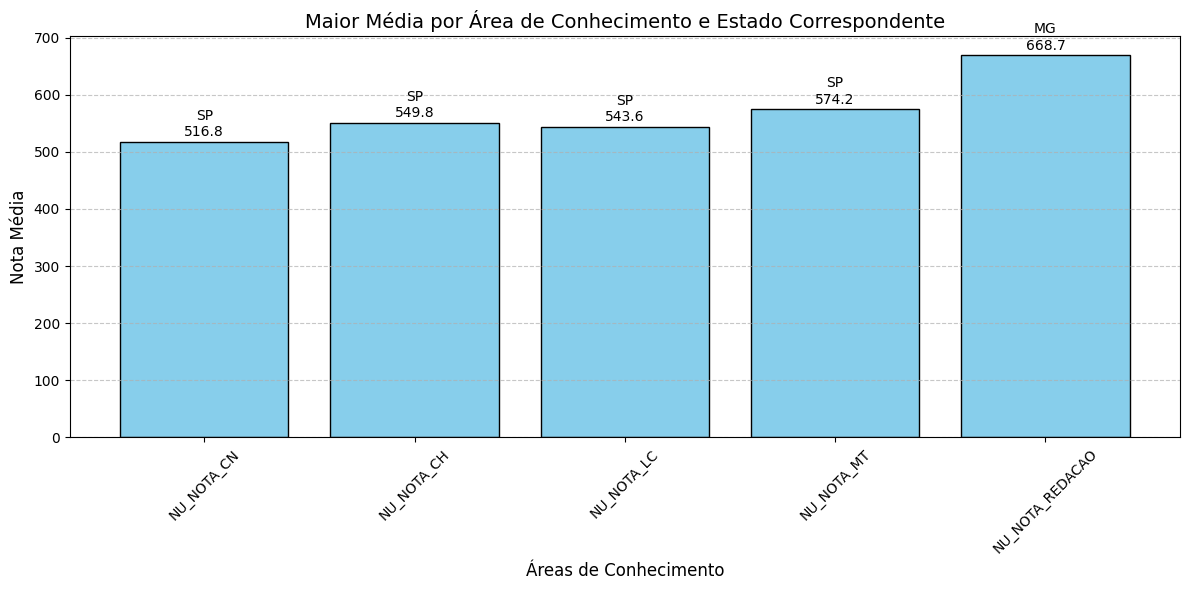

In [ ]:
# Selecionar apenas as colunas de interesse (estado e notas)
columns_of_interest = [
    'SG_UF_PROVA',    # Estado onde o candidato realizou a prova
    'NU_NOTA_CN',     # Nota de Ciências da Natureza
    'NU_NOTA_CH',     # Nota de Ciências Humanas
    'NU_NOTA_LC',     # Nota de Linguagens e Códigos
    'NU_NOTA_MT',     # Nota de Matemática
    'NU_NOTA_REDACAO' # Nota de Redação
]

dados_selecionados = dados[columns_of_interest]

# Remover valores ausentes
dados_limpos = dados_selecionados.dropna()

# Calcular a média das notas por estado
medias_por_estado = dados_limpos.groupby('SG_UF_PROVA').mean()

# Encontrar o estado com maior média em cada área de conhecimento
maior_por_nota = medias_por_estado.idxmax()
maiores_medias = medias_por_estado.max()

# Exibir os resultados no terminal
print("\nMaior estado por média em cada área de conhecimento:")
for coluna, estado in maior_por_nota.items():
    print(f"{coluna}: {estado} (média = {medias_por_estado.loc[estado, coluna]:.2f})")

# Gráfico de barras com rótulos
plt.figure(figsize=(12, 6))
bars = plt.bar(maiores_medias.index, maiores_medias.values, color='skyblue', edgecolor='black')

# Adicionar os rótulos dos estados acima das barras
for bar, coluna in zip(bars, maiores_medias.index):
    estado = maior_por_nota[coluna]
    valor = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, valor + 5, f"{estado}\n{valor:.1f}",
             ha='center', va='bottom', fontsize=10, color='black')

# Personalizar o gráfico
plt.title('Maior Média por Área de Conhecimento e Estado Correspondente', fontsize=14)
plt.ylabel('Nota Média', fontsize=12)
plt.xlabel('Áreas de Conhecimento', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Maiores Notas por Matéria:
NU_NOTA_CN:
 - Inscrição: 210059164663
 - Nota: 868.40
NU_NOTA_CH:
 - Inscrição: 210060450391
 - Nota: 823.00
NU_NOTA_LC:
 - Inscrição: 210058477848
 - Nota: 820.80
NU_NOTA_MT:
 - Inscrição: 210060186085
 - Nota: 958.60
NU_NOTA_REDACAO:
 - Inscrição: 210061125384
 - Nota: 1000.00


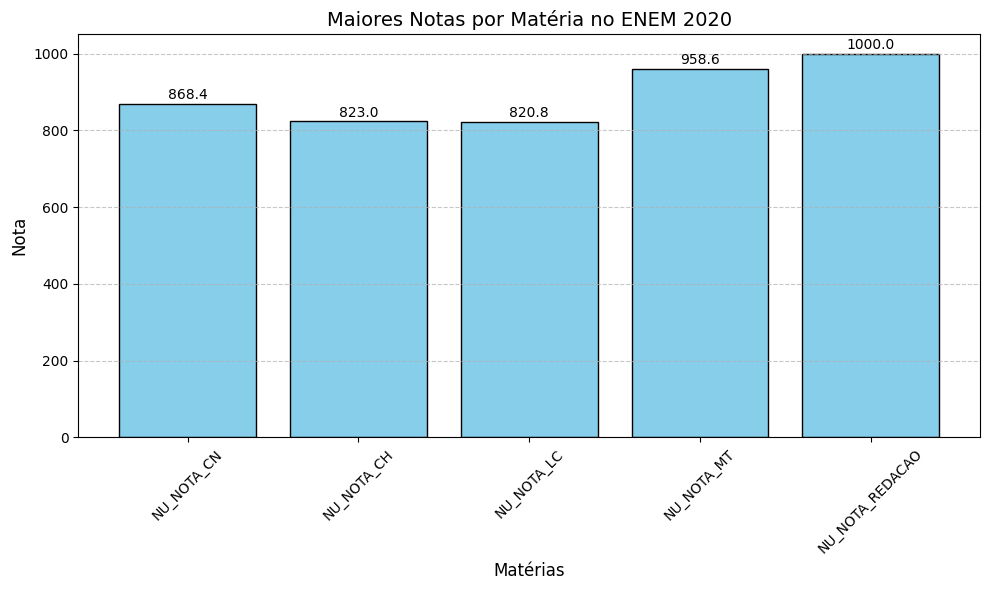

In [ ]:
# Selecionar apenas as colunas de interesse (inscrição e notas)
columns_of_interest = [
    'NU_INSCRICAO',   # Número de inscrição do candidato
    'NU_NOTA_CN',     # Nota de Ciências da Natureza
    'NU_NOTA_CH',     # Nota de Ciências Humanas
    'NU_NOTA_LC',     # Nota de Linguagens e Códigos
    'NU_NOTA_MT',     # Nota de Matemática
    'NU_NOTA_REDACAO' # Nota de Redação
]

dados_selecionados = dados[columns_of_interest]

# Encontrar a maior nota para cada matéria
maiores_notas = dados_selecionados.iloc[:, 1:].max()

# Encontrar os candidatos com as maiores notas
candidatos_maiores_notas = {}
for coluna in maiores_notas.index:
    maior_nota = maiores_notas[coluna]
    candidato = dados_selecionados[dados_selecionados[coluna] == maior_nota]
    candidatos_maiores_notas[coluna] = {
        'inscricao': candidato['NU_INSCRICAO'].values[0],
        'nota': maior_nota
    }

# Exibir resultados
print("\nMaiores Notas por Matéria:")
for materia, info in candidatos_maiores_notas.items():
    print(f"{materia}:")
    print(f" - Inscrição: {info['inscricao']}")
    print(f" - Nota: {info['nota']:.2f}")

# Gráfico das maiores notas por matéria
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(maiores_notas.index, maiores_notas.values, color='skyblue', edgecolor='black')
plt.title('Maiores Notas por Matéria no ENEM 2020', fontsize=14)
plt.ylabel('Nota', fontsize=12)
plt.xlabel('Matérias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar as notas no topo das barras
for i, valor in enumerate(maiores_notas.values):
    plt.text(i, valor + 5, f"{valor:.1f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Remover registros com valores ausentes nas notas
dados_limpos = dados_selecionados.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])


In [ ]:
columns_of_interest = [
    'NU_NOTA_CN',  # Nota de Ciências da Natureza
    'NU_NOTA_CH',  # Nota de Ciências Humanas
    'NU_NOTA_LC',  # Nota de Linguagens e Códigos
    'NU_NOTA_MT',  # Nota de Matemática
    'NU_NOTA_REDACAO',  # Nota de Redação
    'TP_PRESENCA_CN',  # Presença em Ciências da Natureza
    'TP_PRESENCA_CH',  # Presença em Ciências Humanas
    'TP_PRESENCA_LC',  # Presença em Linguagens e Códigos
    'TP_PRESENCA_MT'   # Presença em Matemática
]

dados_selecionados = dados[columns_of_interest]

In [ ]:
# Remover candidatos sem nota em qualquer uma das áreas
dados.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

# Calcular a média geral das notas do ano
media_geral_ano = dados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean()

# Exibir a média geral de cada área de conhecimento
print("Média das notas do ano por área de conhecimento:")
print(media_geral_ano)


Média das notas do ano por área de conhecimento:
NU_NOTA_CN    491.896661
NU_NOTA_CH    516.001877
NU_NOTA_LC    527.227066
NU_NOTA_MT    522.671125
dtype: float64
